## Imports and preparations

In [34]:
import pandas as pd
import numpy as np
import csv
import math
from matplotlib import pyplot as plt
from calendar import month_abbr
from preprocessing_utils import transform_categorical_column, parse_browser_col
from time import strptime
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from dimension_reduction import compare_pca_and_forward_selection

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test.csv")

## Data Exploration

### We will start with a glimpse of data and its features:

In [4]:
print(f"Data description:")
train_data.describe()

Data description:


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


In [5]:
print(f"Data glimpse:")
train_data.head()

Data glimpse:


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


In [6]:
print(f"Number of rows: {train_data.shape[0]}")
print(f"Number of features: {train_data.shape[1]}")

Number of rows: 10479
Number of features: 23


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10479 non-null  int64  
 1   num_of_admin_pages     9874 non-null   float64
 2   admin_page_duration    10066 non-null  float64
 3   num_of_info_pages      9792 non-null   float64
 4   info_page_duration     10162 non-null  object 
 5   num_of_product_pages   10076 non-null  float64
 6   product_page_duration  9858 non-null   object 
 7   total_duration         5726 non-null   float64
 8   BounceRates            10457 non-null  float64
 9   ExitRates              10453 non-null  float64
 10  PageValues             10452 non-null  float64
 11  closeness_to_holiday   9983 non-null   float64
 12  Month                  10454 non-null  object 
 13  device                 10156 non-null  float64
 14  internet_browser       9916 non-null   object 
 15  Re

At first, we tried to look at the data and get familiar with it how it looks, and which data types are used for each column.
We used df.describe, df. head and df.info to just have a glimpse at the data and "feel" how it behaves.
It will later help us to understand how we would like to manipulate it in our favor.

### Let's try to see how that data distributes:

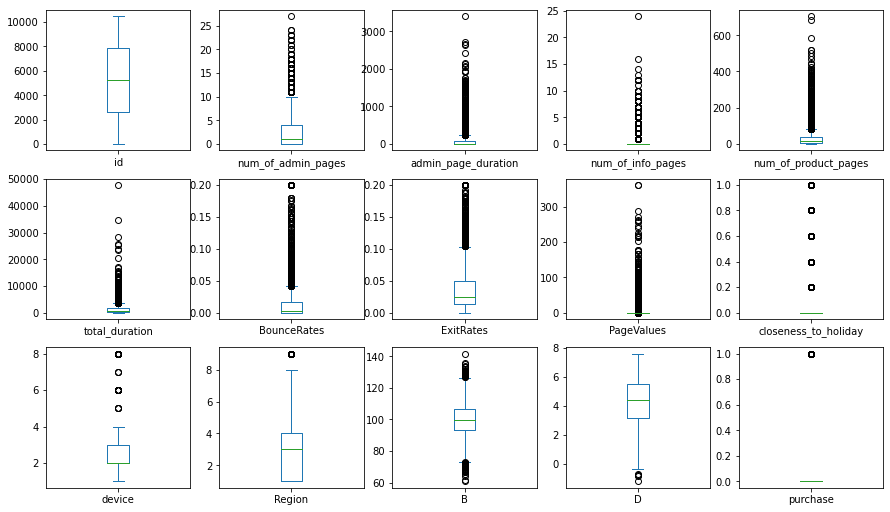

In [9]:
train_data.plot(kind="box", subplots=True,layout = (5,5), figsize=(15,15));

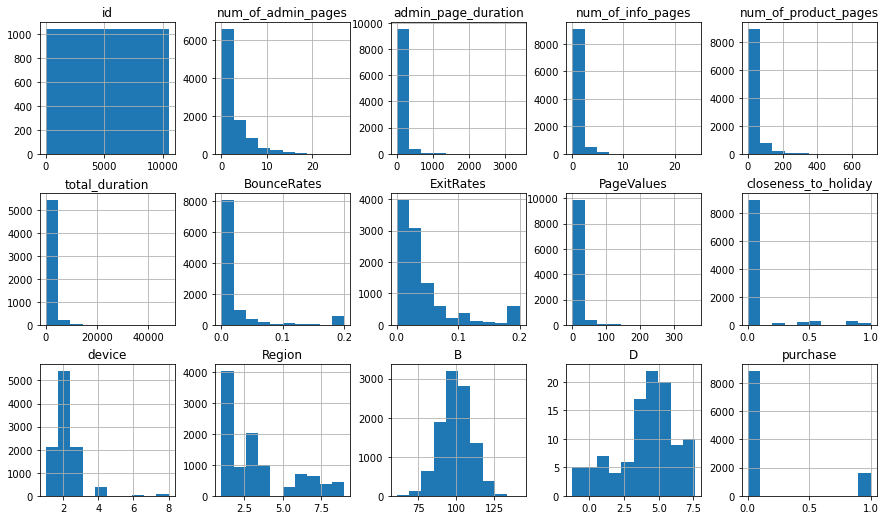

In [10]:
train_data.hist(layout = (5,5), figsize=(15,15));

These two plots help us understand a few things:
1. Not all of the columns are relevant for plotting as they are - like ID and purchase. These are fixed values and it's irrelevant to see their distributions.
2. Some of the coulums are normally distributed, or close to it - like column "B", "D" and "Device".
3. We can easily identify some of the otliers. For example - the values "6" and "8" in "Device" column, some of the durations etc. We will deal with it in a later stage.


TODO - I think we should add more plots to this chapter, not sure which
Maybe discuss outliers we will want to remove later?

## Data cleaning

The next thing we want to check out is whether we have missing data. We did see in the data glimpse that some of the values are filled with NaNs, so we we'd like to see what's the best way to deal with it.

In [5]:
data_summary = pd.DataFrame()
data_summary['missing'] = train_data.isna().sum()
data_summary['percentile'] = (data_summary.missing / train_data.shape[0]) * 100
data_summary.sort_values(by='missing', ascending=False)

,missing,percentile
D,10374,98.997996
total_duration,4753,45.357381
A,706,6.737284
num_of_info_pages,687,6.555969
product_page_duration,621,5.926138
num_of_admin_pages,605,5.773452
internet_browser,563,5.372650
closeness_to_holiday,496,4.733276
admin_page_duration,413,3.941216
num_of_product_pages,403,3.845787


As we can see, column "D" and "total_duration" have the most NaN values. Let's try to see what's special about them:

In [13]:
train_data[train_data["D"].notna()]

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
34,34,0.0,0.000000,0.0,0.0 minutes,9.0,482.0 minutes,NaN,0.000000,0.022222,...,2.0,browser_5_v7,1.0,Returning_Visitor,False,c_6,97.305385,log8080,7.257361,0
179,179,2.0,40.000000,0.0,0.0 minutes,5.0,558.5 minutes,598.500000,0.000000,0.028571,...,2.0,chrome_90.1.7,7.0,New_Visitor,True,c_2,100.425325,log_100,5.521225,0
222,222,1.0,13.000000,0.0,0.0 minutes,2.0,20.0 minutes,NaN,0.000000,0.050000,...,3.0,chrome_98.0.1,3.0,Returning_Visitor,False,c_2,104.686348,log200,4.348781,0
328,328,4.0,61.000000,0.0,0.0 minutes,14.0,175.6666667 minutes,NaN,0.000000,0.010588,...,2.0,chrome_80,5.0,Returning_Visitor,False,c_2,93.755824,log202,5.011107,0
346,346,7.0,151.000000,0.0,0.0 minutes,44.0,1406.1 minutes,NaN,0.004082,0.006501,...,1.0,safari_15,4.0,Returning_Visitor,False,c_2,83.061903,log200,5.531061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,9779,0.0,0.000000,0.0,0.0 minutes,12.0,1952.75 minutes,NaN,0.033333,0.068333,...,2.0,edge_99.0.1150.46,8.0,Returning_Visitor,False,c_1,115.233372,log404,1.632070,0
9924,9924,0.0,0.000000,0.0,0.0 minutes,57.0,1234.5 minutes,NaN,0.001724,0.020690,...,2.0,browser_7_v19,2.0,Returning_Visitor,True,c_2,90.084329,log400,2.905838,0
10282,10282,10.0,260.250000,0.0,0.0 minutes,31.0,1694.333333 minutes,1954.583333,0.017143,0.039048,...,2.0,chrome_99.1.3,4.0,Returning_Visitor,False,c_3,91.706110,log400,3.932566,0
10388,10388,0.0,0.000000,6.0,97.16666667 minutes,81.0,3466.794048 minutes,NaN,0.018431,0.022050,...,3.0,NaN,1.0,Returning_Visitor,True,c_13,80.989223,log_100,4.842721,0


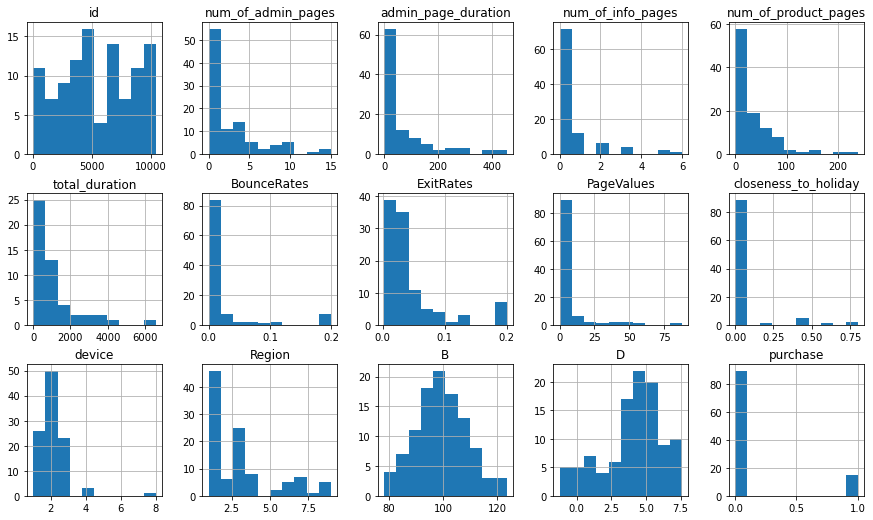

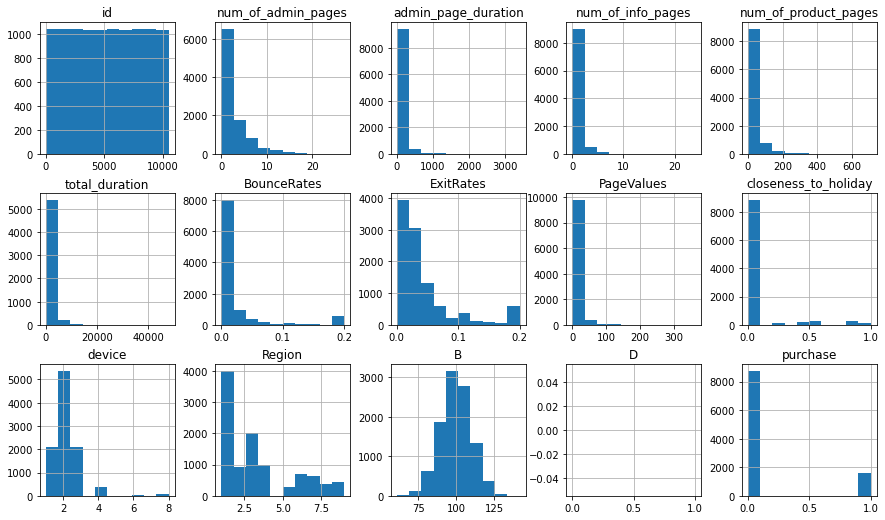

In [14]:
train_data[train_data["D"].notna()].hist(layout = (5,5), figsize=(15,15));
train_data[train_data["D"].isna()].hist(layout = (5,5), figsize=(15,15));
# TODO - add explanation on what we learn from this graph - no explanation == no points

As there not seems to be much change in the data between empty and non empty "D" values, and we saw that the range for the "D" values are -1.23 to 7.61, we will fill it for now with -999.
Because we don't know what column D really stands for, and almost all of the values are empty, we prefer not to try to predict their values.

In [19]:
train_data["D"] = train_data["D"].fillna(-999)
# TODO - (miki) - I disagree to the -999. It doesn't seem right in any way - it gives a strong favor to this data. Suggestion:
# 1. If there is not enough data - let's through this column away.
# 2. If no data means something - maybe we can replace it with a column of binary value "is_d" or something like that.
# 3. Feel the nans with meaningul values like the rest of the places.

Let's move to total_duration:

In [16]:
train_data[train_data["total_duration"].isna()]

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,-999.0,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,-999.0,0
5,5,0.0,0.0,0.0,0.0 minutes,2.0,NaN,NaN,0.000000,0.100000,...,2.0,NaN,2.0,Returning_Visitor,False,c_3,104.712405,log200,-999.0,0
6,6,0.0,0.0,0.0,0.0 minutes,3.0,738.0 minutes,NaN,0.000000,0.022222,...,2.0,edge_96.0.1054.72,1.0,Returning_Visitor,False,c_2,89.786568,log404,-999.0,0
8,8,NaN,0.0,0.0,0.0 minutes,16.0,407.75 minutes,NaN,0.018750,0.025833,...,1.0,safari_15.4,4.0,Returning_Visitor,False,NaN,83.931739,log_100,-999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,10469,NaN,0.0,0.0,0.0 minutes,NaN,1128.583333 minutes,NaN,0.000000,0.013043,...,2.0,chrome_80,1.0,Returning_Visitor,False,c_2,114.103238,log202,-999.0,0
10470,10470,0.0,0.0,0.0,0.0 minutes,8.0,143.5833333 minutes,NaN,0.014286,0.050000,...,2.0,chrome_90.1.7,3.0,Returning_Visitor,False,c_1,94.270379,log404,-999.0,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,-999.0,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,-999.0,0


It is interesting to notice when all durations columns are filled, that they all sum up to form total duration.
Sometimes we can see that the total_duration column is empty even though other durations are filled with actual values. We will fill the empty values with the sum of the other values and vice versa using this formula: admin_page_duration + info_page_duration + product_page_duration = total_duration

To do this better, we need to try and fill the other duration values.
For other fields, we will use KNN to try and fill-in the missing data. We'll start with cleaning it a little bit.

First, we'd like to see the unique values of the columns, to see if we need to pay special attention for some of the column's predictions.

In [9]:
column_list = train_data.columns.values.tolist()
column_list.sort()
for column_name in column_list:
    if column_name not in ['id', 'purchase']:
        print(f"""Column: "{column_name}" ; Unique values: {list(train_data[column_name].unique())[:15]}""")

Column: "A" ; Unique values: ['c_1', 'c_3', 'c_4', 'c_2', nan, 'c_5', 'c_6', 'c_8', 'c_10', 'c_11', 'c_9', 'c_7', 'c_13', 'c_14', 'c_15']
Column: "B" ; Unique values: [118.8800944, 113.3584226, 121.5076952, 93.74717575, 99.54582421, 104.7124049, 89.78656794, 101.1845339, 83.93173925, 97.89963262, 101.2214824, 95.51998611, 109.3586319, 111.5479879, 113.2126221]
Column: "BounceRates" ; Unique values: [0.2, 0.02, 0.015789474, 0.0, 0.01875, 0.008333333, 0.002857143, 0.05, 0.043478261, 0.04, 0.014285714, 0.015384615, 0.025, 0.028571429, 0.003030303]
Column: "C" ; Unique values: [202.0, 404.0, 100.0, 200.0, 400.0, 8080.0, nan]
Column: "D" ; Unique values: [nan, 7.257360853, 5.521225205, 4.34878126, 5.011107258, 5.531061246, 3.274955241, 0.796733734, 3.816877219, 0.058866821, 7.618253527, 4.826132322, 3.305456104, 5.386814934, 4.319823481]
Column: "ExitRates" ; Unique values: [0.2, 0.05, 0.024561404, 0.1, 0.022222222, 0.066666667, 0.025833333, 0.028571429, 0.016312636, 0.007692308, 0.01, 0.00

Our end goal is to have all our columns in a numeric form, without missing data.
We can see from the returned values above that there are some columns that should be interpreted as integers, and not as floats (num_of_X_pages, region, device...).
In addition, it wouldn't be smart to assume column "A"'s and "C"'s empty values using KNN, since a value is fixed. We will use a different approach for it.
Moreover, we will fill NaN values for user_type as Others, since we can't assume the real type.

Let's start with re-orginaizing the data a little bit:

In [6]:
# TODO - replace with the nice functions from the module to get a more elegant look
train_data['info_page_duration'] = train_data['info_page_duration'].apply(lambda x: float(x.split()[0]) if type(x) == str else x) # extract float from string
train_data['product_page_duration'] = train_data['product_page_duration'].apply(lambda x: float(x.split()[0]) if type(x) == str else x) # extract float from string
train_data['Month'] = train_data['Month'].apply(lambda x: strptime(x[:3], '%b').tm_mon if type(x) == str else x) # convert month name to number
train_data['C'] = train_data['C'].str.extract('(\d+)') # extract only digits
train_data['C'] = train_data['C'].apply(lambda x: float(x) if type(x) == str else x) # make it a float
train_data['Weekend'] = train_data['Weekend'].apply(lambda x: 1 if x == True else x) # 1 as True
train_data['Weekend'] = train_data['Weekend'].apply(lambda x: 0 if x == False else x) # 0 as False


In [7]:
int_cols = ['Month', 'device', 'num_of_admin_pages', 'num_of_info_pages', 'num_of_product_pages', 'Region']
forbidden_cols = ['A', 'C', 'id', 'purchase', 'total_duration', 'internet_browser', 'user_type']

def knn_mean(df, n, col):
    out = df.copy()
    if col not in forbidden_cols:
        for i, val in enumerate(df):
            if math.isnan(val):
                n_by_2 = np.ceil(n/2)
                lower = np.max([0, int(i-n_by_2)])
                upper = np.min([len(df)+1, int(i+n_by_2)])
                ts_near = np.concatenate([df[lower:i], df[i:upper]])
                out[i] = np.nanmean(ts_near)
                if col in int_cols:
                    out[i] = round(out[i])
    return out


In [10]:
for column in column_list:
    try:
        train_data[column] = knn_mean(train_data[column],8, column)
    except Exception as e:
        print(e)
        print(column)

/var/folders/28/zczhf10x31gd80g6tj6qwq340000gn/T/ipykernel_86526/2791795127.py:13: RuntimeWarning: Mean of empty slice
  out[i] = np.nanmean(ts_near)


We got to columns that we weren't able to deal with. We will clean it with different approach - since "user_type" has 3 options ('Returning', 'New' and 'Other'), we will fill the NaN value with "Other", since we can't assume the real type of the user.

In [11]:
# TODO - why use "other" and not a new type of "unknown"?
print(f"Unique values in 'user_type' before fillna: {list(train_data['user_type'].unique())}")
train_data['user_type'] = train_data['user_type'].fillna('Other') # filled NaN values with "other"

Unique values in 'user_type' before fillna: ['Returning_Visitor', 'New_Visitor', nan, 'Other']


Now that we finally have all the durations, we can fill in the total duration NaN values with the sum of all other duration columns.

In [12]:
train_data['total_duration'] = train_data['total_duration'].fillna(train_data['info_page_duration'] + train_data['product_page_duration'] + train_data['admin_page_duration'])

We're down to 3 columns - "A", "C" and "internet_borwser". 
Since there aren't many missing values in column "C" to begin with, we'll just fill it in with the most common value. It probably won't mess our data too much.
The interenet browsers' missing values will be filled as unknowns.
For column "A", since we don't know its nature, we will currently fill it with the value c_0

In [13]:
most_common_c = train_data['C'].mode()
train_data['C'] = train_data['C'].fillna(200) #TODO: check why var doesn't work
train_data = parse_browser_col(train_data, 'internet_browser')
train_data['A'] = train_data['A'].fillna('c_0')
train_data['C'] = train_data['C'].fillna(train_data['C'].mode())

One last thing.... We want to convert the categorial values to integers. It will later help us to remove outlayers. The relevant columns are user_type and browser_name.
In addition, we need to leave only digits in column "A".

In [14]:
pd.set_option('display.max_columns', None)
train_data.head()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,device,Region,user_type,Weekend,A,B,C,D,purchase,browser_name,browser_version
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.200000,0.200000,0.0,0.0,2.0,1.0,1.0,Returning_Visitor,0.0,c_1,118.880094,202.0,NaN,0,safari,15.0
1,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.200000,0.200000,0.0,0.0,2.0,4.0,9.0,Returning_Visitor,0.0,c_3,113.358423,404.0,NaN,0,safari,14.0
2,2,0.0,0.0,0.0,0.0,5.0,627.500000,627.500000,0.020000,0.050000,0.0,0.0,2.0,3.0,1.0,Returning_Visitor,1.0,c_4,121.507695,202.0,NaN,0,browser,3.0
3,3,0.0,0.0,0.0,0.0,19.0,154.216667,154.216667,0.015789,0.024561,0.0,0.0,2.0,2.0,1.0,Returning_Visitor,0.0,c_3,93.747176,100.0,NaN,0,chrome,99.0
4,4,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.200000,0.200000,0.0,0.4,2.0,2.0,3.0,Returning_Visitor,0.0,c_3,99.545824,202.0,NaN,0,edge,96.0


In [15]:
train_data['browser_name'], browser_mapping = pd.factorize(train_data['browser_name'])

In [16]:
train_data['user_type'], user_mapping = pd.factorize(train_data['user_type'])

In [17]:
train_data['A'] = train_data['A'].str.extract('(\d+)', expand=False)
train_data['A'] = train_data['A'].astype(float)

Finally, let's see that filled in all the NaN values and make sure that it didn't mess our data completely.

In [20]:
data_summary = pd.DataFrame()
data_summary['missing'] = train_data.isna().sum()
data_summary['percentile'] = (data_summary.missing / train_data.shape[0]) * 100
data_summary.sort_values(by='missing', ascending=False)

,missing,percentile
id,0,0.0
num_of_admin_pages,0,0.0
browser_name,0,0.0
purchase,0,0.0
D,0,0.0
C,0,0.0
B,0,0.0
A,0,0.0
Weekend,0,0.0
user_type,0,0.0


Mofified data:


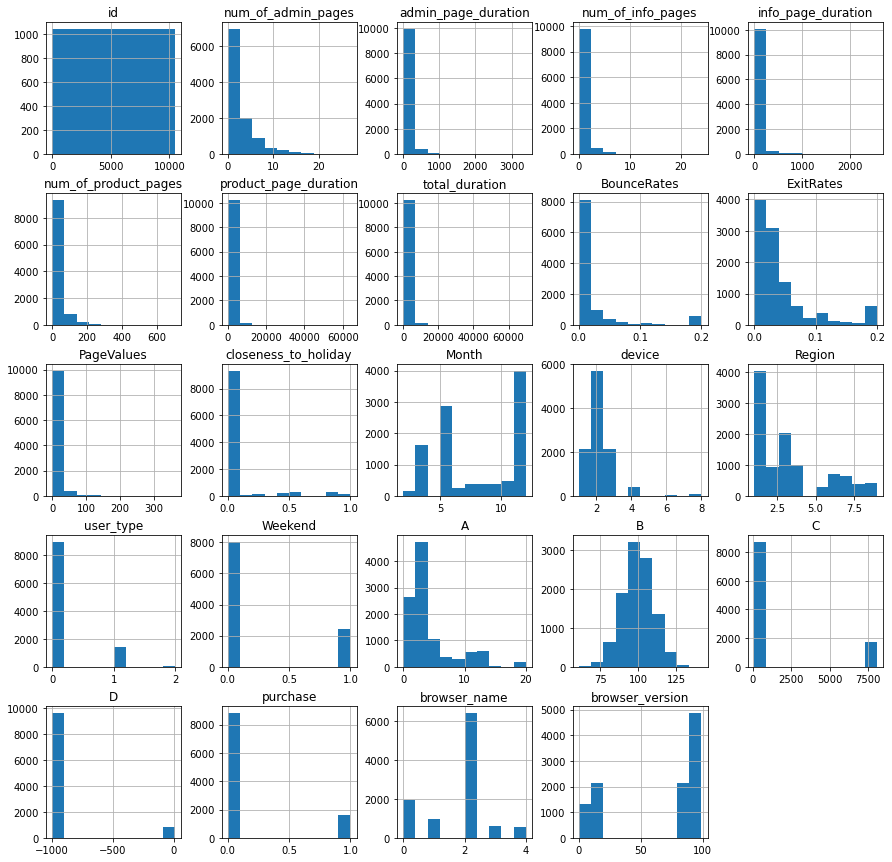

In [21]:
print("Mofified data:")
train_data.hist(layout = (5,5), figsize=(15,15));
# TODO - add explanation on what we learn from this graph - no explanation == no points

Now we will implement it on the test set as well.

In [44]:
# TODO - no need to do that in my opinion, whe showed it once - in the second time let's just call the function and remove all this
test_data["D"] = test_data["D"].fillna(-999)

test_data['info_page_duration'] = test_data['info_page_duration'].apply(lambda x: float(x.split()[0]) if type(x) == str else x) # extract float from string
test_data['product_page_duration'] = test_data['product_page_duration'].apply(lambda x: float(x.split()[0]) if type(x) == str else x) # extract float from string
test_data['Month'] = test_data['Month'].apply(lambda x: strptime(x[:3], '%b').tm_mon if type(x) == str else x) # convert month name to number
test_data['C'] = test_data['C'].str.extract('(\d+)') # extract only digits
test_data['C'] = test_data['C'].apply(lambda x: float(x) if type(x) == str else x) # make it a float
test_data['Weekend'] = test_data['Weekend'].apply(lambda x: 1 if x == True else x) # 1 as True
test_data['Weekend'] = test_data['Weekend'].apply(lambda x: 0 if x == False else x) # 0 as False

for column in list(test_data.columns):
    try:
        test_data[column] = knn_mean(test_data[column],8, column)
    except Exception as e:
        print(e)
        print(column)

most_common_c = test_data['C'].mode()
test_data['C'] = test_data['C'].fillna(200) #TODO: check why var doesn't work
test_data = parse_browser_col(test_data, 'internet_browser')
test_data['A'] = test_data['A'].fillna('c_0')
test_data['C'] = test_data['C'].fillna(test_data['C'].mode())

test_data['user_type'] = test_data['user_type'].fillna('Other') # filled NaN values with "other"
test_data['total_duration'] = test_data['total_duration'].fillna(test_data['info_page_duration'] + test_data['product_page_duration'] + test_data['admin_page_duration'])
test_data['browser_name'], browser_mapping_test = pd.factorize(test_data['browser_name'])
test_data['user_type'], user_mapping_test = pd.factorize(test_data['user_type'])
test_data['A'] = test_data['A'].str.extract('(\d+)', expand=False)
test_data['A'] = test_data['A'].astype(float)

In [45]:
data_summary_test = pd.DataFrame()
data_summary_test['missing'] = test_data.isna().sum()
data_summary_test['percentile'] = (data_summary_test.missing / test_data.shape[0]) * 100
data_summary_test.sort_values(by='missing', ascending=False)

,missing,percentile
id,0,0.0
Month,0,0.0
browser_name,0,0.0
D,0,0.0
C,0,0.0
B,0,0.0
A,0,0.0
Weekend,0,0.0
user_type,0,0.0
Region,0,0.0


#

# Removing outliers

During the data exploration we already notice that our data containes possible outliers.
Outliers could cause our predictions to be inaccurate, so we would like to remove potential outliers before moving forward.
To make sure we remove only absolute outliers, we will use a zscore test.

In [22]:
z_scores = stats.zscore(train_data)
z_scores

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,device,Region,user_type,Weekend,A,B,C,D,purchase,browser_name,browser_version
0,-1.731886,-0.712769,-0.456709,-0.405203,-0.245188,-0.700320,-0.627334,-0.640339,3.706812,3.257461,-0.315558,-0.314196,-1.664360,-1.254218,-0.897169,-0.400415,-0.548630,-0.692998,1.903249,-0.467644,-0.291559,-0.427783,-1.685201,-1.270624
1,-1.731555,-0.712769,-0.456709,-0.405203,-0.245188,-0.700320,-0.627334,-0.640339,3.706812,3.257461,-0.315558,-0.314196,-1.664360,2.099146,2.432541,-0.400415,-0.548630,-0.197016,1.353310,-0.398389,-0.291559,-0.427783,-1.685201,-1.295809
2,-1.731224,-0.712769,-0.456709,-0.405203,-0.245188,-0.609653,-0.298524,-0.333828,-0.038708,0.148215,-0.315558,-0.314196,-1.664360,0.981358,-0.897169,-0.400415,1.826327,0.050976,2.164949,-0.467644,-0.291559,-0.427783,-0.693723,-1.572841
3,-1.730894,-0.712769,-0.456709,-0.405203,-0.245188,-0.292319,-0.546524,-0.565010,-0.126323,-0.379084,-0.315558,-0.314196,-1.664360,-0.136430,-0.897169,-0.400415,-0.548630,-0.197016,-0.599901,-0.502615,-0.291559,-0.427783,0.297756,0.844898
4,-1.730563,-0.712769,-0.456709,-0.405203,-0.245188,-0.700320,-0.627334,-0.640339,3.706812,3.257461,-0.315558,1.725010,-1.664360,-0.136430,-0.064742,-0.400415,-0.548630,-0.197016,-0.022376,-0.467644,-0.291559,-0.427783,1.289234,0.769344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,1.730563,0.208660,0.366218,-0.405203,-0.245188,0.478351,0.307372,0.301806,-0.306246,-0.286445,0.338828,-0.314196,1.283867,2.099146,-0.897169,-0.400415,1.826327,-0.692998,-2.014043,-0.399760,-0.291559,-0.427783,-0.693723,-1.497287
10475,1.730894,-0.712769,-0.456709,-0.405203,-0.245188,-0.609653,-0.383281,-0.412837,-0.454877,-0.445996,-0.315558,-0.314196,0.989044,0.981358,-0.897169,-0.400415,1.826327,1.042940,-0.031197,-0.467644,-0.291559,-0.427783,0.297756,0.819713
10476,1.731224,-0.712769,-0.456709,-0.405203,-0.245188,-0.586987,-0.530787,-0.550340,1.279160,0.908253,-0.315558,-0.314196,0.989044,0.981358,-0.897169,-0.400415,1.826327,2.282896,-0.533155,2.233320,-0.291559,-0.427783,0.297756,0.844898
10477,1.731555,0.515803,-0.031057,-0.405203,-0.245188,-0.382986,-0.446030,-0.434696,-0.454877,-0.451815,-0.315558,-0.314196,0.989044,-0.136430,-0.064742,-0.400415,-0.548630,1.786914,0.911165,-0.399760,-0.291559,-0.427783,0.297756,0.366387


In [32]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
train_data_wo_outliers = train_data[filtered_entries]

print(f"Original shape: {train_data.shape}")
print(f"New shape: {train_data_wo_outliers.shape}")

# TODO - let's add a plot in here + I think we were very sensitive if we removed 25% - it's not really "outliers" anymore in my opinion. WDYT?

Original shape: (10479, 25)
New shape: (7691, 25)


# Dimensions Reduction

One does not wan't to fall for "the curse of dimensionality" - phenomenons happens when dealing with a dataset with large amount of features.
It can cause many trouble, including "distracting" with random data, orverfitting, increasing runtime
We have a relatively big number of features - 24 - and we'd like to reduce it in a way that improves our model performance.
We will try and do that in 2 ways:
1. "Logical" reduction - remove correlated or redundant features
2. Programmatic methods  - we'll test both Forward Selection and PCA to see if they yield better results.


### 1. Logical dimension Reduction
Let's plot a correlation matrix and see if we find any interesting correlations:

<AxesSubplot:>

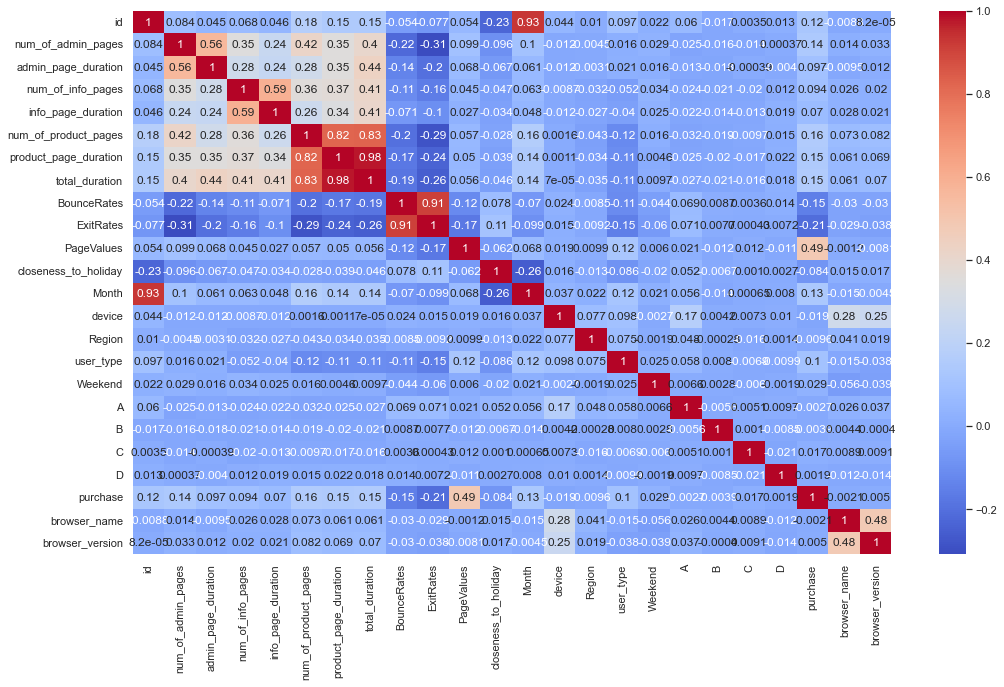

In [26]:
sns.set(rc={'figure.figsize':(17, 10)})
sns.heatmap(train_data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Notes from correlation matrix:
&nbsp;
1. **BoundRates and ExitRates have very high correlation** - 0.91 . Looking at the features explenations their meaning sounds very much alike, this can explain the similarity. We can use only one of them,  let's start with using ExitRates as a slightly better correlation with purchase, but we can validate it more thoroughly with methods such as forward selection.
&nbsp;
2. **Pages number and duration** - Total_duration and num_of_product_pages are also highly correlated - 0.98. After learning the relation of the different duration columns before, we can  explain it if most of the session time is dedicated to reviewing products. In general, all those column are relatively correlated and it seems like some of them are redundant. We can choose a strict reduction and take total duraion + only number of pages without duration, or a more "loose" reduction of removing only "total duration" as you can imply it from the other columns.
&nbsp;
3. **D is strongly negatively correlated (-0.75) to purchase,** which is the label we'll be trying to predict. It is interesting as earlier we have noticed most of its values are Nan. Below we've tried to look deeper on the connection between the two by grouping them together and counting how many sessions fit to each combination, and it looks like the ratio of purchase vs not is pretty much the same whether there is D or not.
&nbsp;
4. Other than this, the column most correlated with purchase is **PageValues** (0.49). It also makes sense as usually if the user exists without making a purchase, it hints a 0 value. If a purchase was made, it is very likely the value will be highter than 0. Below a mode detail validation on this theory. We expect to also see this with feature selection.
&nbsp;
&nbsp;
__Conclusions:__
- We'll try using only total duration and the number of pages and drop the other durations.
- We'll drop BoundRates and use only ExitRates
Those conclusions should be varified but we'll get to it later when we measure model performance for evaluation.

In [28]:
"""
Check connection between pages to the existence of page value (higher than 0).
It is noticeable that it's much more likely that if value == 0, a purchase was made and vice versa.
"""
pg_value_to_purchase = pd.DataFrame()
pg_value_to_purchase['purchase'] = train_data['purchase']
pg_value_to_purchase['is_page_value'] = train_data['PageValues'].apply(lambda x: x != 0)
pg_value_to_purchase.groupby(['purchase', 'is_page_value']).size()

purchase  is_page_value
0         False            7834
          True             1024
1         False             309
          True             1312
dtype: int64

In [31]:
# Check the connection between D and purchase, is it an interesting column to indicate purchase (doesn't seem so)
train_data['no_D'] = train_data.D == -999
train_data[['no_D', 'purchase','id']].groupby(['no_D', 'purchase']).count()

id
no_D  purchase      
False 0          692
      1          129
True  0         8166
      1         1492

### Programmatic methods for dimension reduction

We will test 2 methods - forward selection and PCA with 0.95 variance - and see which yields best performance.
We will be making some assumptions:
1. The performance evaluation will be measured using Linear Regression model, as a simple model that will be easy to predict with and measure the errors. We weren't sure what should be done first - model selection or dimension reduction - so we followed the order of the exercise, assuming linear regression will reflect impact on performance of other models as well.
2. The metric for evaluation was chosen to be RMSE after researching what metric is more often used for this use case. There is no consensus and different metrics will yield different results.
&nbsp;

To make the assment easy and comfortable, we've build a function running:
1. Forward selection - compare each number of features to the one before it and pick the best number of features subset.
2. PCA - variance of 0.95 was chosen as a const for not loosing too much of the data. Different consts would yield different results and it is configurable in change this assumption changes.

We will run all this after removing the columns suggested above ('BoundRates', 'admin_page_duration', 'product_page_duration', 'info_page_duration')

PCA RMSE: 0.3016478119209466
New best score! n=1 Best features set: ['PageValues'], RMSE: 0.3056225862785516
New best score! n=2 Best features set: ['num_of_product_pages' 'PageValues'], RMSE: 0.3042862958401277
New best score! n=3 Best features set: ['num_of_product_pages' 'ExitRates' 'PageValues'], RMSE: 0.30280067238950403
New best score! n=4 Best features set: ['num_of_product_pages' 'ExitRates' 'PageValues' 'Month'], RMSE: 0.3018629170464115
New best score! n=6 Best features set: ['num_of_product_pages' 'BounceRates' 'ExitRates' 'PageValues' 'Month'
 'user_type'], RMSE: 0.3017235214492565
New best score! n=7 Best features set: ['num_of_product_pages' 'BounceRates' 'ExitRates' 'PageValues' 'Month'
 'device' 'user_type'], RMSE: 0.3014009135420195
New best score! n=9 Best features set: ['num_of_product_pages' 'total_duration' 'BounceRates' 'ExitRates'
 'PageValues' 'closeness_to_holiday' 'Month' 'device' 'user_type'], RMSE: 0.30123940153433487


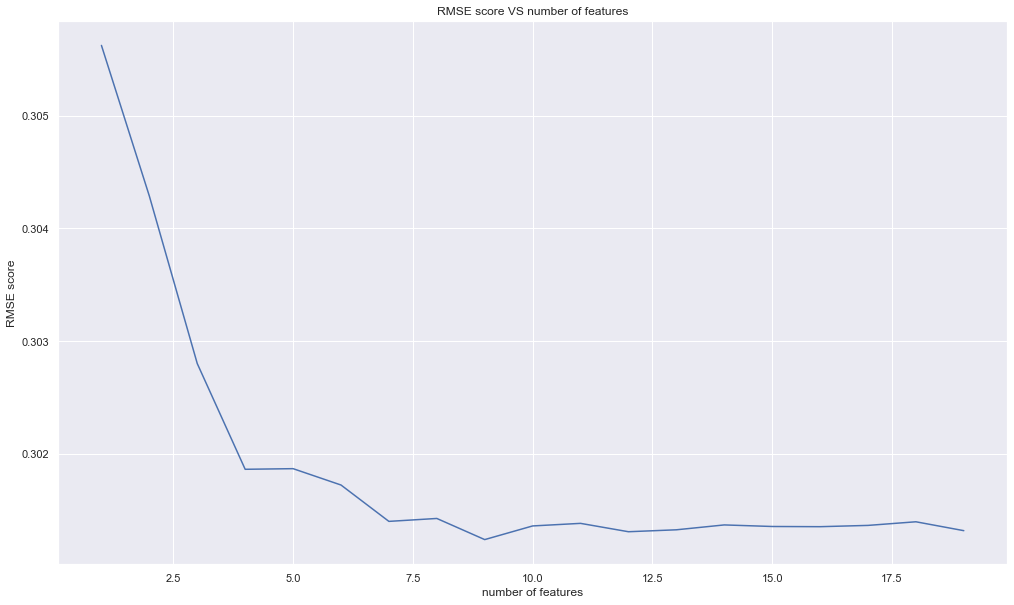

Best forward selection RMSE: 0.30123940153433487
Forward Selection scored best. Features to use: ['num_of_product_pages' 'total_duration' 'BounceRates' 'ExitRates'
 'PageValues' 'closeness_to_holiday' 'Month' 'device' 'user_type']


In [38]:
# We will add id to ignored cols as it is just the row id and should not indicate anything more.
cols_not_in_x_data = ['id', 'purchase', 'BoundRates', 'admin_page_duration', 'product_page_duration', 'info_page_duration']
y = train_data['purchase']
X = train_data[[col for col in train_data.columns if col not in cols_not_in_x_data]]
x_train, x_validation, y_train, y_validation = train_test_split(
       X, y, test_size=0.2, random_state=42, shuffle=True
)
compare_pca_and_forward_selection(x_train, y_train, x_validation, y_validation)

The script shows that Forward selection with 9 features - now that we've used the combination of methods to compare dimension reduction, we will use this conclusion and from now on and in our final pipeline, we will only use those features in our dataset for predictions.

The features: ['num_of_product_pages' 'total_duration' 'BounceRates' 'ExitRates'
 'PageValues' 'closeness_to_holiday' 'Month' 'device' 'user_type']

In [40]:
reduced_train_data = train_data[['num_of_product_pages', 'total_duration', 'BounceRates', 'ExitRates',
 'PageValues', 'closeness_to_holiday', 'Month', 'device', 'user_type']]

# Running models

We're almost there! We already have out dataset nice and shiny, clean from all dirt and reduced to a better size. All columns are numeric, and no data is missing.
The next step is almost the final one - we run the different models, explore the best hyperparameters combination and build the best pipeline to run predictions with.
&nbsp;
We've decided to take the 4th part - model evaluation - and do it in advance to use in this section. We have built a generic utility to measure each model performance as requested - it receives a trained model and a dataset, returns:
1. Confusion metrics
2. ROC curve plot on K-Fold cross validation and the AUC score.

YALLA AVIIII